In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
import seaborn as sns

In [2]:
data_path = r'../data/processed_data_v3.csv'

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.shape

(689, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   review                    689 non-null    object
 1   rating                    689 non-null    int64 
 2   regex_cleaned_review      689 non-null    object
 3   stopwords_cleaned_review  689 non-null    object
 4   brand_cleaned_review      689 non-null    object
 5   stemmed_review            689 non-null    object
dtypes: int64(1), object(5)
memory usage: 32.4+ KB


In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
data.head()

,review,rating,regex_cleaned_review,stopwords_cleaned_review,brand_cleaned_review,stemmed_review
0,"sepertinya ini termasuk produk indomie yang palaing parah, kenapa rasa salted egg kyk gini, bagian pengujiannya bagaimana ya... kecewa banget mana awal"" hrganya wow banget mahal..",1,sepertinya ini termasuk produk indomie yang palaing parah kenapa rasa salted egg kyk gini bagian pengujiannya bagaimana ya kecewa banget mana awal hrganya wow banget mahal,produk indomie palaing parah salted egg kyk gini pengujiannya kecewa banget hrganya wow banget mahal,produk palaing parah kyk gini pengujiannya kecewa banget hrganya wow banget mahal,produk palaing parah kyk gin uji kecewa banget hrganya wow banget mahal
1,"Awal liat tuh kayak enak banget tapi pas udh coba mie ini baru 2 suap dah mau muntah, maaf tapi saya kurang suka dengan rasanya.",1,awal liat tuh kayak enak banget tapi pas udh coba mie ini baru suap dah mau muntah maaf tapi saya kurang suka dengan rasanya,liat tuh kayak enak banget pas udh coba mie suap dah muntah maaf kurang suka,liat tuh kayak enak banget pas udh coba suap dah muntah maaf kurang suka,liat tuh kayak enak banget pas udh coba suap dah muntah maaf kurang suka
2,"Waktu pertama melihat produknya, saya cukup excited karena saya suka sekali dengan produk berbau 'salted egg'. Ternyata Indomie varian ini tidak sesuai dengan ekspetasi saya. Perpaduan tekstur mie dan saus salted egg ternyata agak 'menjijikkan'. Sama sekali tidak cocok.",1,waktu pertama melihat produknya saya cukup excited karena saya suka sekali dengan produk berbau salted egg ternyata indomie varian ini tidak sesuai dengan ekspetasi saya perpaduan tekstur mie dan saus salted egg ternyata agak menjijikkan sama sekali tidak cocok,produknya excited suka produk berbau salted egg indomie varian sesuai ekspetasi perpaduan tekstur mie saus salted egg menjijikkan cocok,produknya excited suka produk berbau varian sesuai ekspetasi perpaduan tekstur saus menjijikkan cocok,produk excited suka produk bau varian sesuai ekspetasi padu tekstur saus jijik cocok
3,"Saya penikmat mie instan, saya suka mencoba banyak rasa mie instan karena saya penasaran. Ketika booming salted egg, semua makanan ada varian salted egg. Jadi saat itu saya beli karena ya Indomie terkenal dengan rasanya yang enak, namun saya mencoba dan jujur ini bukan salted egg yang saya suka. Rasanya saya jauh lebih baik jika makan Indomie gorengnya saja. Mungkin saya saja yang tidak suka. Tapi itu pendapat saya",1,saya penikmat mie instan saya suka mencoba banyak rasa mie instan karena saya penasaran ketika booming salted egg semua makanan ada varian salted egg jadi saat itu saya beli karena ya indomie terkenal dengan rasanya yang enak namun saya mencoba dan jujur ini bukan salted egg yang saya suka rasanya saya jauh lebih baik jika makan indomie gorengnya saja mungkin saya saja yang tidak suka tapi itu pendapat saya,penikmat mie instan suka mencoba mie instan penasaran booming salted egg makanan varian salted egg beli indomie terkenal enak mencoba jujur salted egg suka makan indomie gorengnya suka pendapat,penikmat instan suka mencoba instan penasaran booming makanan varian beli terkenal enak mencoba jujur suka makan gorengnya suka pendapat,nikmat instan suka coba instan penasaran booming makan varian beli kenal enak coba jujur suka makan goreng suka dapat
4,"ini mie aku kira enak karena rasa telur asin kayaknya gurih2 sedep gtu. eh pas coba, baunya menusuk banget di hidung pas dirasain after tastenya enggak enak banget, nyendal di langit-langit mulut dan enggak ilang-ilang rasanya padaha udah minum air banyak banget. sayang untuk rasa ini indomie fail bagt",1,ini mie aku kira enak karena rasa telur asin kayaknya gurih sedep gtu eh pas coba baunya menusuk banget di hidung pas dirasain after tastenya enggak enak banget nyendal di langit langit mulut dan enggak ilang ilang rasanya padaha udah minum air banyak banget sayang untuk rasa ini indomie fail bagt,mie enak telur asin kayaknya gurih sedep gtu eh pa

In [5]:
data.sample(n=10, random_state=50)

,review,rating,regex_cleaned_review,stopwords_cleaned_review,brand_cleaned_review,stemmed_review
16,"Kurang suka rasanya. Baunya aneh, terlalu menyengat",1,kurang suka rasanya baunya aneh terlalu menyengat,kurang suka baunya aneh menyengat,kurang suka baunya aneh menyengat,kurang suka bau aneh sengat
570,pernah beli karena liat harganya murah. ternyata pas dicoba lumayan juga menyerap minyak di wajah. isinya pun banyak,3,pernah beli karena liat harganya murah ternyata pas dicoba lumayan juga menyerap minyak di wajah isinya pun banyak,beli liat harganya murah pas dicoba lumayan menyerap minyak wajah isinya,beli liat harganya murah pas dicoba lumayan menyerap minyak wajah isinya,beli liat harga murah pas coba lumayan serap minyak wajah isi
468,Nyobain yg rasa jasmine.. segerr banget rasanya..rasa teh nya terasa,5,nyobain yg rasa jasmine segerr banget rasanya rasa teh nya terasa,nyobain yg jasmine segerr banget teh nya,nyobain yg jasmine segerr banget teh nya,nyobain yg jasmine segerr banget teh nya
339,Saya pribadi suka dengan rasa unik telur asin ini. Saya tidak mengerti kenapa banyak yang menyukainya. Mungkin baunya saja yang agak menggelitik di hidung.,5,saya pribadi suka dengan rasa unik telur asin ini saya tidak mengerti kenapa banyak yang menyukainya mungkin baunya saja yang agak menggelitik di hidung,pribadi suka unik telur asin mengerti menyukainya baunya menggelitik hidung,pribadi suka unik telur asin mengerti menyukainya baunya menggelitik hidung,pribadi suka unik telur asin erti suka bau gelitik hidung
104,"Pertama di buka bumbunya bau nyengat. Setelah matang dan saya aduk bumbunya sm mie nya lengket. Rasanya tidak enak, lebih baik indomie goreng yang biasa.",2,pertama di buka bumbunya bau nyengat setelah matang dan saya aduk bumbunya sm mie nya lengket rasanya tidak enak lebih baik indomie goreng yang biasa,buka bumbunya bau nyengat matang aduk bumbunya sm mie nya lengket enak indomie goreng,buka bumbunya bau nyengat matang aduk bumbunya sm nya lengket enak goreng,buka bumbu bau nyengat matang aduk bumbu sm nya lengket enak goreng
2,"Waktu pertama melihat produknya, saya cukup excited karena saya suka sekali dengan produk berbau 'salted egg'. Ternyata Indomie varian ini tidak sesuai dengan ekspetasi saya. Perpaduan tekstur mie dan saus salted egg ternyata agak 'menjijikkan'. Sama sekali tidak cocok.",1,waktu pertama melihat produknya saya cukup excited karena saya suka sekali dengan produk berbau salted egg ternyata indomie varian ini tidak sesuai dengan ekspetasi saya perpaduan tekstur mie dan saus salted egg ternyata agak menjijikkan sama sekali tidak cocok,produknya excited suka produk berbau salted egg indomie varian sesuai ekspetasi perpaduan tekstur mie saus salted egg menjijikkan cocok,produknya excited suka produk berbau varian sesuai ekspetasi perpaduan tekstur saus menjijikkan cocok,produk excited suka produk bau varian sesuai ekspetasi padu tekstur saus jijik cocok
665,"Harganya murah, mudah banget ditemuin dimana-mana, cuma kertasnya terlalu tipis dan kurang menyerap minyak",4,harganya murah mudah banget ditemuin dimana mana cuma kertasnya terlalu tipis dan kurang menyerap minyak,harganya murah mudah banget ditemuin kertasnya tipis kurang menyerap minyak,harganya murah mudah banget ditemuin kertasnya tipis kurang menyerap minyak,harga murah mudah banget ditemuin kertas tipis kurang serap minyak
487,"Aku pernah nyobain ini karena dikasih sama temen. Menurut aku, face paper ini gabisa ngangkat minyak banget, cuma sedikit yang keangkat, dan rentan robek banget. Tapi sepertinya harganya murah.",2,aku pernah nyobain ini karena dikasih sama temen menurut aku face paper ini gabisa ngangkat minyak banget cuma sedikit yang keangkat dan rentan robek banget tapi sepertinya harganya murah,nyobain dikasih temen face paper gabisa ngangkat minyak banget keangkat rentan robek banget harganya murah,nyobain dikasih temen face paper gabisa ngangkat minyak banget keangkat rentan robek banget harganya murah,nyobain kasih teme

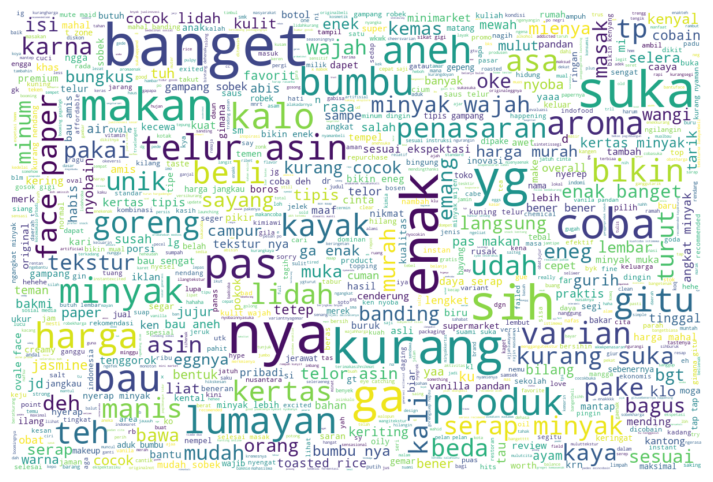

In [8]:
wc = WordCloud(background_color="white", max_words=1000, max_font_size=100, random_state=25,
               width=1200, height=800).generate(''.join(data['stemmed_review']))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
data["review_sentiment"] = data.rating.map({
    1 : "Negative",
    2 : "Negative",
    3 : "Neutral",
    4 : "Positive",
    5 : "Positive"
})

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_x, test_x, train_y, test_y = train_test_split(
    data.stemmed_review, 
    data.review_sentiment,
    test_size=0.2,
    stratify=data.review_sentiment,
    random_state=50
)

In [9]:
#import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [10]:
from sklearn.neural_network import MLPClassifier

In [14]:
# Create pipeline
mlp_pipe = Pipeline(steps=[
    ('tf-idf', TfidfVectorizer()),
    ('MLP', MLPClassifier(random_state=50)),
])

# Training
mlp_pipe.fit(train_x, train_y)

# Make prediction
mlp_prediction = mlp_pipe.predict(test_x)

print(classification_report(test_y, mlp_prediction))

              precision    recall  f1-score   support

    Negative       0.67      0.65      0.66        34
     Neutral       0.65      0.70      0.67        56
    Positive       0.71      0.67      0.69        48

    accuracy                           0.67       138
   macro avg       0.68      0.67      0.67       138
weighted avg       0.68      0.67      0.67       138



In [15]:
unique_elements, counts_elements = np.unique(mlp_prediction, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[['Negative' 'Neutral' 'Positive']
 ['33' '60' '45']]


In [16]:
classes = ['Negative', 'Neutral', 'Positive']

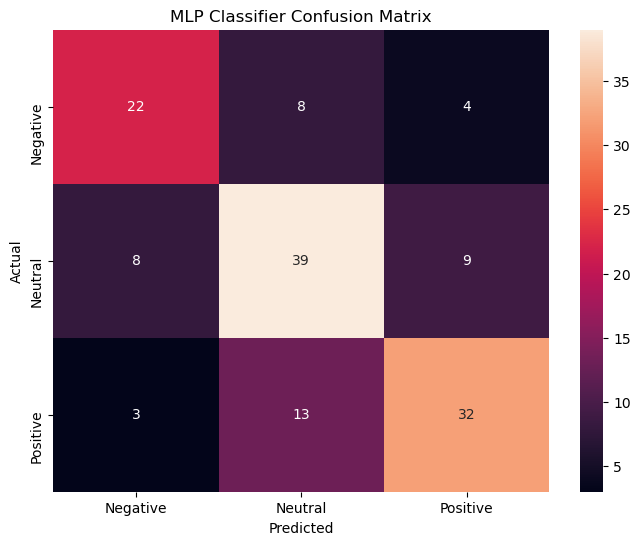

In [17]:
conf_mat = confusion_matrix(test_y, mlp_prediction)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('MLP Classifier Confusion Matrix')
plt.show()

In [21]:
hidden_layer = []
mlp_acc_collection = []

for x in range(100, 500, 20):
    mlp_pipe = Pipeline(
        steps=[
            ('tf-idf', TfidfVectorizer()),
            ('MLP', MLPClassifier(random_state=50, hidden_layer_sizes=(x,),)),
        ])
    mlp_pipe.fit(train_x, train_y)
    hidden_layer.append(x)
    mlp_prediction = mlp_pipe.predict(test_x)
    mlp_acc = accuracy_score(test_y, mlp_prediction)
    mlp_acc_collection.append(mlp_acc)

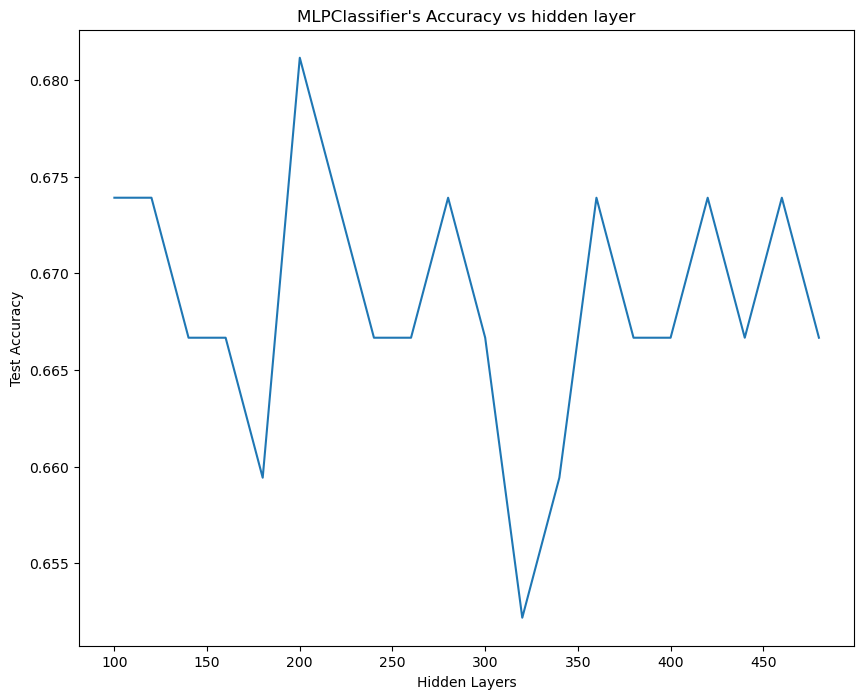

In [22]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=hidden_layer, y=mlp_acc_collection, )
plt.title('MLPClassifier\'s Accuracy vs hidden layer')
plt.xlabel('Hidden Layers')
plt.ylabel('Test Accuracy')
# plt.savefig('Random_forest_rmse.png')
plt.show()

In [11]:
# Create pipeline
mlp_pipe = Pipeline(steps=[
    ('tf-idf', TfidfVectorizer()),
    ('MLP', MLPClassifier(random_state=50, hidden_layer_sizes=(200,)),),
])

# Training
mlp_pipe.fit(train_x, train_y)

# Make prediction
mlp_prediction = mlp_pipe.predict(test_x)

print(classification_report(test_y, mlp_prediction))

              precision    recall  f1-score   support

    Negative       0.69      0.65      0.67        34
     Neutral       0.65      0.70      0.67        56
    Positive       0.72      0.69      0.70        48

    accuracy                           0.68       138
   macro avg       0.68      0.68      0.68       138
weighted avg       0.68      0.68      0.68       138



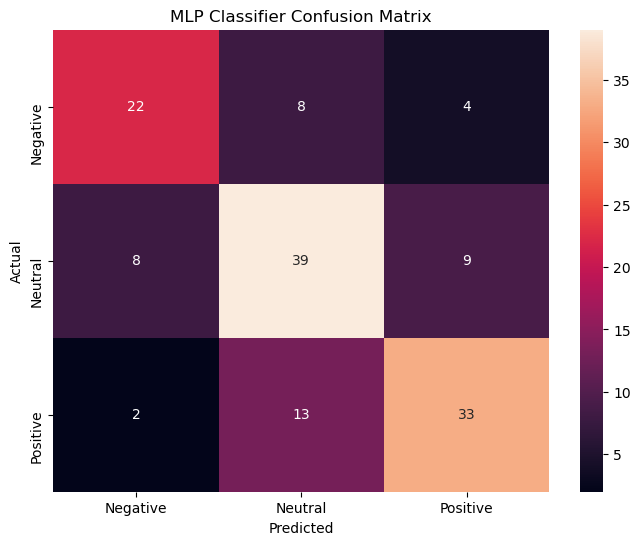

In [24]:
conf_mat = confusion_matrix(test_y, mlp_prediction)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('MLP Classifier Confusion Matrix')
plt.show()

In [15]:
mlp_pipe.predict(['sangat bagus nih'])

array(['Positive'], dtype='<U8')

### Tuning aplha

In [35]:
from sklearn.model_selection import GridSearchCV

In [38]:
train_x_tf = TfidfVectorizer().fit_transform(train_x)

In [33]:
parameters = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1],
}

In [34]:
mlp_tune_pipe = Pipeline(steps=[
    ('tf-idf', TfidfVectorizer()),
    ('MLP', MLPClassifier(random_state=50, hidden_layer_sizes=(200,)),),
])

In [40]:
mlp_tune_grid = GridSearchCV(MLPClassifier(random_state=50, hidden_layer_sizes=(200,)), parameters, scoring='accuracy', cv=5)

In [41]:
mlp_tune_grid.fit(train_x_tf, train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(200,),
                                     random_state=50),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy')

In [43]:
print(mlp_tune_grid.best_params_)
print(mlp_tune_grid.best_score_)

{'alpha': 0.01}
0.6498116298116299


In [24]:
# Create pipeline
mlp_pipe = Pipeline(steps=[
    ('tf-idf', TfidfVectorizer()),
    ('MLP', MLPClassifier(random_state=50, hidden_layer_sizes=(200,), alpha=0.0001),),
])

# Training
mlp_pipe.fit(train_x, train_y)

# Make prediction
mlp_prediction = mlp_pipe.predict(test_x)

print(classification_report(test_y, mlp_prediction))

              precision    recall  f1-score   support

    Negative       0.69      0.65      0.67        34
     Neutral       0.65      0.70      0.67        56
    Positive       0.72      0.69      0.70        48

    accuracy                           0.68       138
   macro avg       0.68      0.68      0.68       138
weighted avg       0.68      0.68      0.68       138



In [41]:
# Create pipeline
mlp_pipe = Pipeline(steps=[
    ('tf-idf', TfidfVectorizer()),
    ('MLP', MLPClassifier(random_state=50, hidden_layer_sizes=(200,), alpha=0.0001, max_iter=200),),
])

# Training
mlp_pipe.fit(train_x, train_y)

# Make prediction
mlp_prediction = mlp_pipe.predict(test_x)

print(classification_report(test_y, mlp_prediction))

              precision    recall  f1-score   support

    Negative       0.69      0.65      0.67        34
     Neutral       0.65      0.70      0.67        56
    Positive       0.72      0.69      0.70        48

    accuracy                           0.68       138
   macro avg       0.68      0.68      0.68       138
weighted avg       0.68      0.68      0.68       138



In [42]:
import joblib as jb

In [44]:
mlp_pipe_name = '../model_file/MLP_TF_Model.sav'

In [45]:
jb.dump(mlp_pipe, mlp_pipe_name)

['../model_file/MLP_TF_Model.sav']

In [46]:
mlp_load = jb.load(mlp_pipe_name)

In [51]:
mlp_load.predict(['Produk aspal (asli tapi palsu) spesifikasinya rancu'])

array(['Neutral'], dtype='<U8')